In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

### 读入

In [3]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [3]:
def ReadFile(filename,file_sep=",",file_header='infer'):
    import os
    if not os.path.exists(filename):
        print('File [{}] not exist, please double check!'.format(filename))
    else:
        if os.path.splitext(filename)[1]=='.csv':
            df=pd.read_csv(filename)
        elif os.path.splitext(filename)[1]=='.xlsx':
            df=pd.read_excel(filename)
        elif os.path.splitext(filename)[1]=='.txt':
            df=pd.read_csv(filename,sep=file_sep,header=file_header)
        elif os.path.splitext(filename)[1]=='.json':
            df=pd.read_json(filename)
        return df


In [4]:
df_test2=ReadFile('11.txt')

File [11.txt] not exist, please double check!


In [5]:
df_test = ReadFile('titanic.csv')
df_test.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [37]:
    def ReadCSV(filename):
        #读入数据
        df = pd.read_csv(filename)
        return df
    df = ReadCSV('titanic.csv')
    df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### 删除重复记录

In [6]:
iris = sns.load_dataset('iris')
#加一行异常数据测试用
iris.tail(3)
iris.loc[150] = [9,5,8,6,'virginica']
iris.loc[151] = [9,5,8,6,'virginica']
iris.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
150,9.0,5.0,8.0,6.0,virginica
151,9.0,5.0,8.0,6.0,virginica


In [20]:
def Del_dup(df):
    df.drop_duplicates(inplace = True)
    return df

df=Del_dup(iris)
df.tail(3)


,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica
150,9.0,5.0,8.0,6.0,virginica


### 把数值型数据找出来

In [38]:
    def Find_num(df):
        #把数值型数据找出来
        # print(df.dtypes)
        df=df.select_dtypes(include=np.number)
        # df=df.select_dtypes(include=object)
        # df= df.select_dtypes("float64")
        # df= df.select_dtypes("category")
        return df
    df=Find_num(df)
    df

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,NaN,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


### 缺失值处理

In [15]:
    def MissingData(df):
        #填补缺失值
        ## 均值填充
        # df= df.fillna(data_test.mean())
        #data_test_filled
        ## 上下值填充
        df = df.fillna(method='ffill')
        # df = df.fillna(method='bfill')
        return df
    df=MissingData(df)
    df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


### 异常值处理

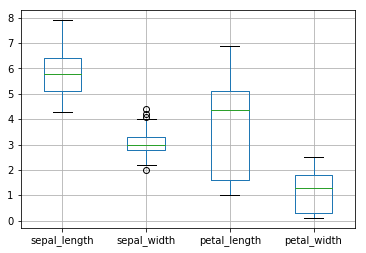

In [16]:
#异常值
import seaborn as sns
iris = sns.load_dataset('iris')
iris.boxplot()

In [17]:
# iris
#加一行异常数据测试用
iris.tail(3)
iris.loc[150] = [9,5,8,6,'virginica']
iris.loc[151] = [9,5,8,6,'virginica']
iris.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
150,9.0,5.0,8.0,6.0,virginica
151,9.0,5.0,8.0,6.0,virginica


In [23]:
    def Outlier_zscore(df,z_score_threshold=2.2):
        # 通过Z-Score方法判断异常值
        df_zscore = df.copy()  # 复制一个用来存储Z-score得分的数据框
        cols = df.columns  #  获得列表框的列名
        for col in cols:
            df_col = df[col]  #  得到每一列的值
            z_score = (df_col - df_col.mean()) / df_col.std()  #计算每一列的Z-score得分
            df_zscore[col] = z_score.abs() > z_score_threshold  
            # 判断Z-score得分是否大于2.2，如果是则是True，否则为False
            df_drop_outlier = df[df_zscore[col] == False]
        # df_drop_outlier
        # df_zscore
        return df_drop_outlier
    # df_outlier=Outlier_zscore(df,z_score_threshold=1)
    df_outlier=Outlier_zscore(df)
    type(df_outlier)#dataframe
    # df_outlier.describe()
    df_outlier.count()
    

sepal_length    149
sepal_width     149
petal_length    149
petal_width     149
dtype: int64

In [27]:
    def Outlier_threesigma(df,t=3):
        def three_sigma(Ser1,t):
            '''
            Ser1：表示传入DataFrame的某一列。
            '''
            rule = (Ser1.mean()-t*Ser1.std()>Ser1) | (Ser1.mean()+t*Ser1.std()< Ser1)
            index = np.arange(Ser1.shape[0])[rule]
            return index  #返回落在3sigma之外的行索引值
        def delete_out3sigma(data,t):
            out_index = [] #保存要删除的行索引
            for i in range(data.shape[1]): # 对每一列分别用3sigma原则处理
                index = three_sigma(data.iloc[:,i],t)
                out_index += index.tolist()
            delete_ = list(set(out_index))
            print('所删除的行索引为：',delete_)
            data.drop(delete_,inplace=True)
            return data
        df=delete_out3sigma(df,t)
        return df


In [30]:
    df2=Outlier_threesigma(df,t=2)
    df2.describe()

所删除的行索引为： [32, 33, 131, 135, 15, 144, 117, 118, 122, 60]


,sepal_length,sepal_width,petal_length,petal_width
count,135.000000,135.000000,135.000000,135.000000
mean,5.787407,3.051852,3.661481,1.175556
std,0.820396,0.429830,1.748816,0.845750
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.000000,1.800000
max,9.000000,5.000000,8.000000,6.000000
